<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage.util.shape import view_as_windows
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import glob

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
activities = ['brush_teeth','drink_glass','climb_stairs','pour_water',
          'use_telephone','eat_meat','walk','comb_hair','eat_soup',
          'descend_stairs','getup_bed','sitdown_chair','liedown_bed','standup_chair']

def segment_file(d_input,w):
  window_shape = (32,3)  
  c = view_as_windows(d_input.values,window_shape)
  d = c[:w,:,:]
  return pd.DataFrame(d.reshape(w,96))

def loadall_and_slice(w):
  df = pd.DataFrame()
  fid = 0
  feature = 0
  for fol in activities:
      print (fol)
      file_path = glob.glob('/content/gdrive/''My Drive''/aml-homeworks/homework5/HMP_Dataset/' + fol + '/*.txt')
      for file in file_path:
          temp_df=pd.read_csv(file, sep = " ", names=['a','b','c'])
          slice_df = segment_file(temp_df,w)
          slice_df['fid'] = fid
          slice_df['feature'] = feature
          df = df.append(slice_df) 
          fid += 1
      feature += 1
  return df

def compute_kmeans(k,df_input):
  return KMeans(n_clusters=k, random_state=0).fit(df_input.values[:,:96])

def compute_feature_vector(df_input,kmeans,k):
  unq = np.unique(kmeans.predict(df_input.values[:,:96]),return_counts=True)
  a = np.zeros((k,), dtype=int)
  for i in range(len(unq[1])):
    a[unq[0][i]] = unq[1][i]
  return a / np.linalg.norm(a)  

def plot_hist(feature,k,f):
  arr = np.mean(feature.values[:,:k],axis=0)
  plt.bar(range(len(arr)), arr, width=5, label='0')
  plt.xlabel(activities[f], fontsize=10)
  plt.show()
  
def train_and_predict(train,test,k):
  clf = RandomForestClassifier(n_estimators=300,max_depth=40,random_state=0)
  clf.fit(train.values[:,:k],train.values[:,-1])
  return clf.predict(test.values[:,:k])

def label_race(row):
  if row[0] == row[1]:
    return 1
  else:
    return 0

def compute_acc(original,predict):
  r = 0
  for i in range(len(original)):
    if original[i] == predict[i]:
      r = r +1
  total = len(original)
  print(r*100/total)
  return r/len(original) * 100
  
def consufion_matrix(orig,pref):
  return confusion_matrix(orig, pref)
   
def main_compute(k,w):
  total_df = loadall_and_slice(w)
  print('computing kmeans')
  kmeans = compute_kmeans(k,total_df)

  
def process_data(total_df,kmeans,k):
  df_vectors = pd.DataFrame()
  for f in range(total_df['fid'].max()):
    file = f
    d2 = total_df.loc[total_df['fid'] == f]
    feature = d2['feature'].max()
    feature_vector = pd.DataFrame(compute_feature_vector(d2,kmeans,k).reshape(1,k))
    feature_vector['fid'] = f
    feature_vector['feature'] = feature
    df_vectors = df_vectors.append(feature_vector)
  
  trn_df = pd.DataFrame()
  tst_df = pd.DataFrame()
  for activity in range(14):
    df_fet = df_vectors.loc[df_vectors['feature'] == activity]
    plot_hist(df_fet,k,activity)
    msk = np.random.rand(len(df_fet)) < 0.7
    train = df_fet[msk]
    test = df_fet[~msk]
    trn_df = trn_df.append(pd.DataFrame(train.values),ignore_index=True)
    tst_df = tst_df.append(pd.DataFrame(test.values),ignore_index=True)

  predict  =  train_and_predict(trn_df,tst_df,k) 
  print(compute_acc(tst_df.values[:,-1],predict))
  print(consufion_matrix(tst_df.values[:,-1],predict))
  
   

In [0]:
df = pd.read_csv('/content/gdrive/''My Drive''/aml-homeworks/homework5/HMP_Dataset/climb_stairs/Accelerometer-2011-03-24-10-24-39-climb_stairs-f1.txt',delim_whitespace=True)


In [0]:
d.reshape(32,96)

array([[ 2, 41, 34, ..., 18, 35, 35],
       [ 5, 39, 34, ..., 18, 36, 37],
       [12, 38, 34, ..., 17, 37, 35],
       ...,
       [14, 33, 32, ..., 15, 36, 30],
       [16, 35, 35, ..., 13, 38, 33],
       [18, 35, 35, ..., 13, 39, 32]])

In [158]:
d1 = loadall_and_slice(32)

brush_teeth
drink_glass
climb_stairs
pour_water
use_telephone
eat_meat
walk
comb_hair
eat_soup
descend_stairs
getup_bed
sitdown_chair
liedown_bed
standup_chair


In [0]:
km = compute_kmeans(480,d1)

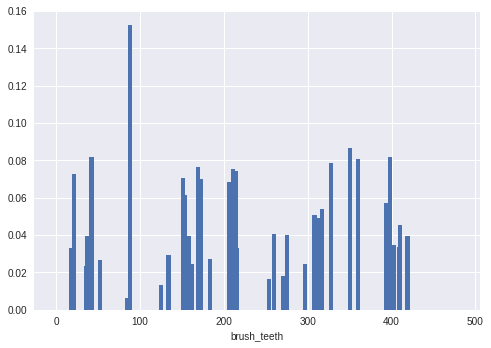

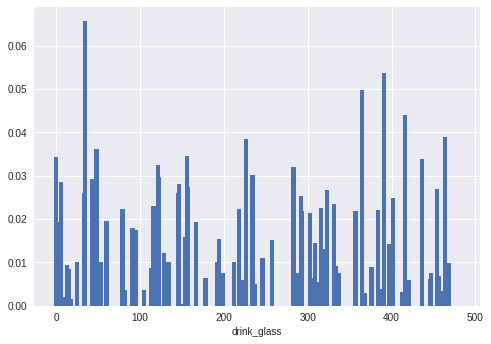

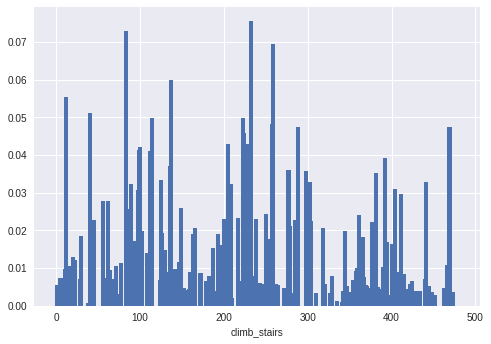

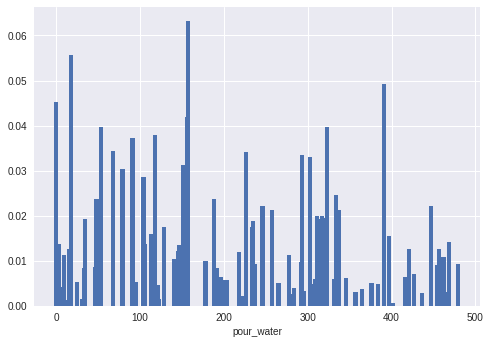

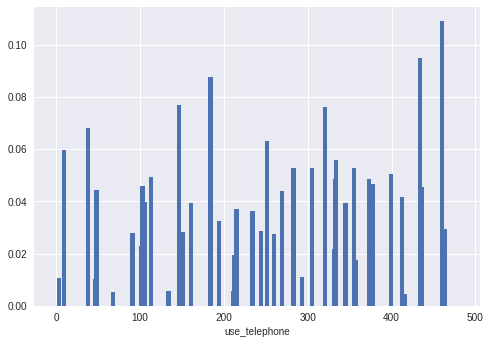

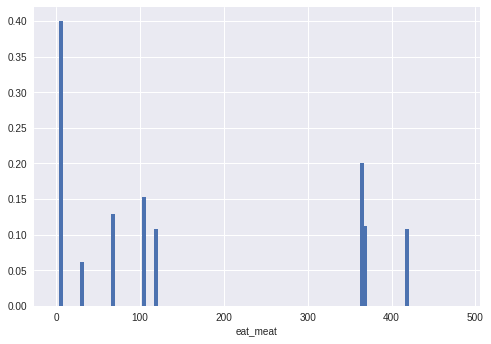

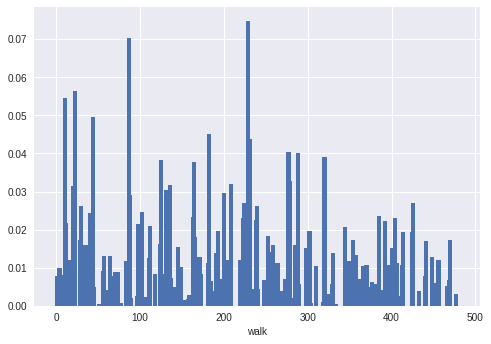

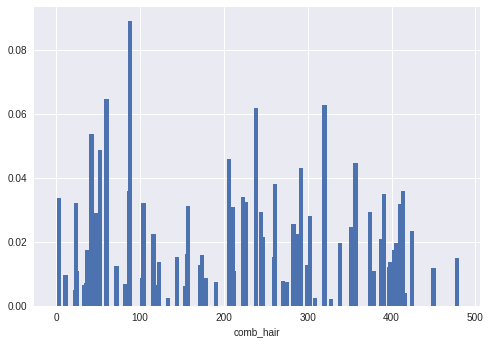

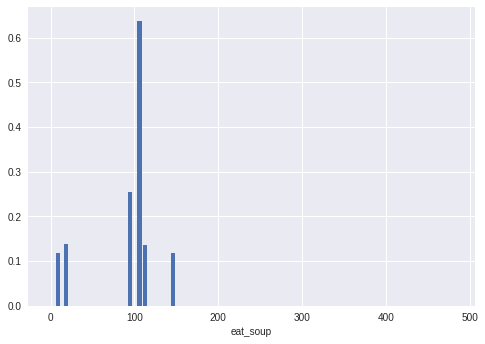

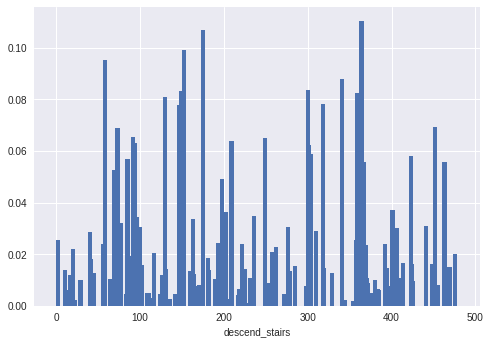

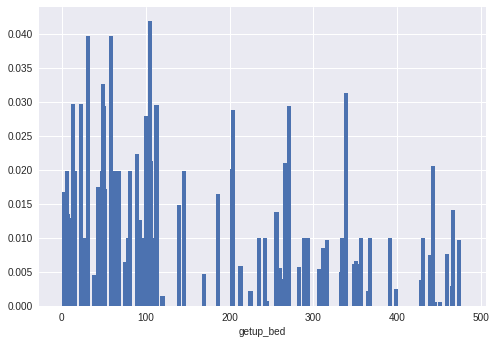

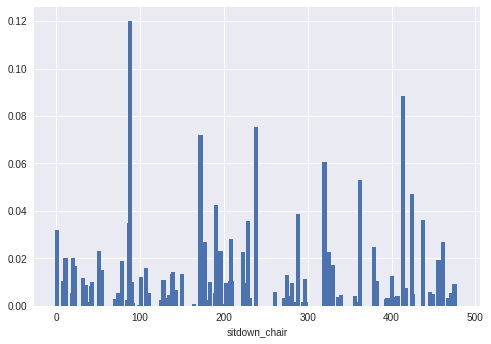

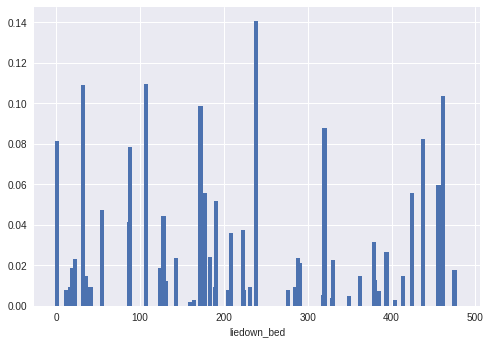

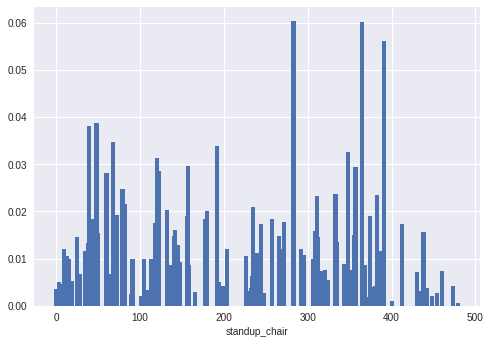

47
0
[[ 0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  7  0  4  0  0  0  0 12  0  0  2]
 [ 0  0 18  0  0  4  0  1  3  0  0  0]
 [ 0  8  0 11  0  0  0  0 11  0  0  4]
 [ 0  2  0  1  0  0  0  0  2  0  0  0]
 [ 0  0  3  0  0 13  0  0  1  3  0  1]
 [ 3  2  0  0  0  0  0  0  1  1  0  1]
 [ 0  0  0  0  0  2  0  6  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 30  0  0  4]
 [ 0  0  0  0  0  3  0  0  8 21  0  0]
 [ 0  0  0  0  0  0  0  0  1 10  0  0]
 [ 0  5  0  3  0  0  0  0 16  0  0  7]]


In [178]:
process_data(d1,km,480)

In [167]:
f_v = compute_feature_vector(d_t,km,400)


NameError: ignored

In [0]:
t = np.unique(f_v,return_counts=True)
df_input

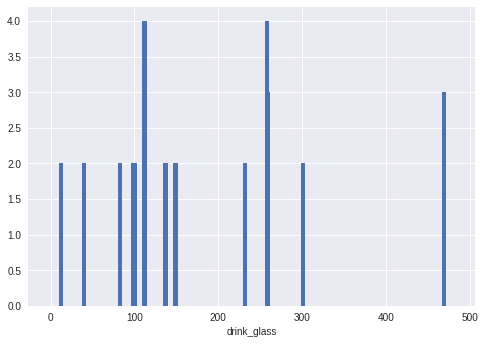

In [0]:
plot_hist(pd.DataFrame(f_v),480,1)

In [0]:
d1
#d1['fid'].max()

In [174]:
process_data(d1,km,100)

49
0
[[ 0  0  0  0  0  0  0  1  0  0  0  2  0  0]
 [ 0 17  0 10  0  0  0  0  0  0  0  0  0  2]
 [ 0  1 17  0  0  0  5  0  0  2  0  3  0  2]
 [ 0 12  0 12  0  0  0  1  0  0  2  0  0  7]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0 15  0  0  1  1  5  0  0]
 [ 1  2  0  1  0  0  0  0  0  0  0  3  0  2]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  2  0  0  5  0  0  0  1]
 [ 0  1  1  1  0  0  1  0  0  0 21  3  0  5]
 [ 0  0  0  0  0  0  3  0  0  0  2 18  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  4  0]
 [ 0 12  0  2  0  0  0  0  0  0  7  0  0 11]]
